## Setting up Environment and Previewing Data

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import itertools
import scipy

In [71]:
#adjusting jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [72]:
# importing dataset

from dotenv import load_dotenv

load_dotenv()

dataset_path = os.getenv('DATASET_PATH')

application_df = pd.read_csv(dataset_path) 

In [73]:
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [74]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [75]:
# listing all columns
list(application_df)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## Visualizing Null Values

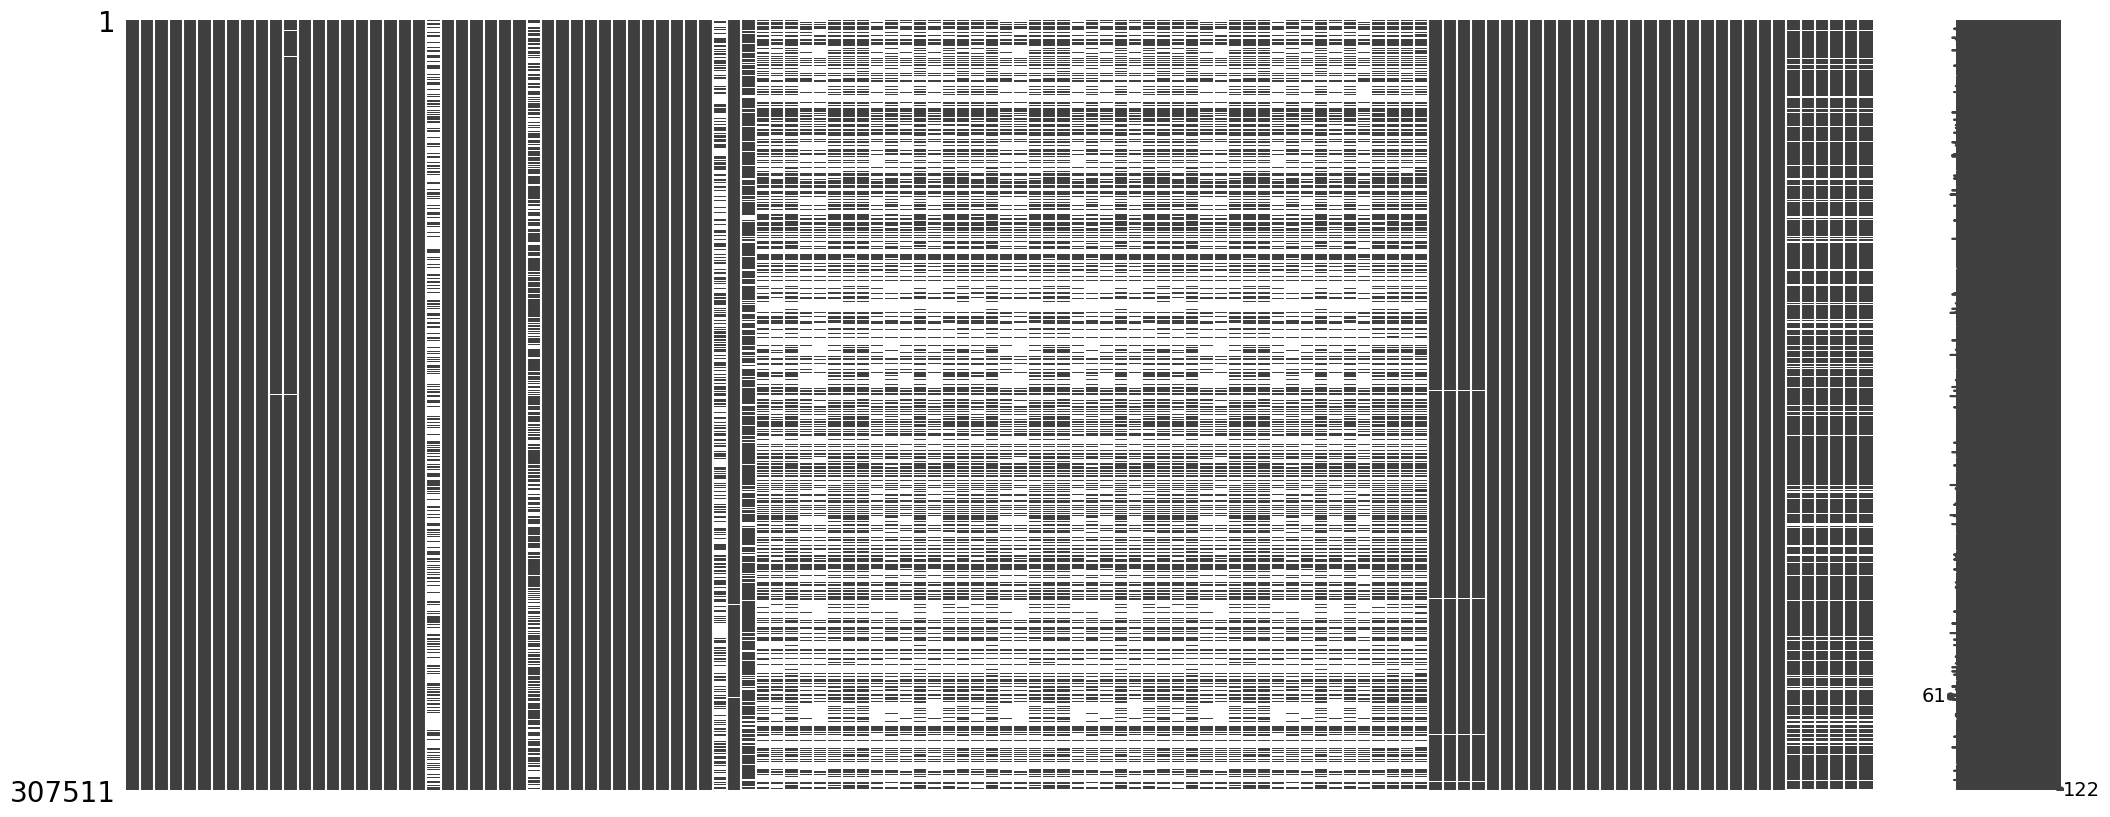

In [76]:
import missingno as mn

mn.matrix(application_df);

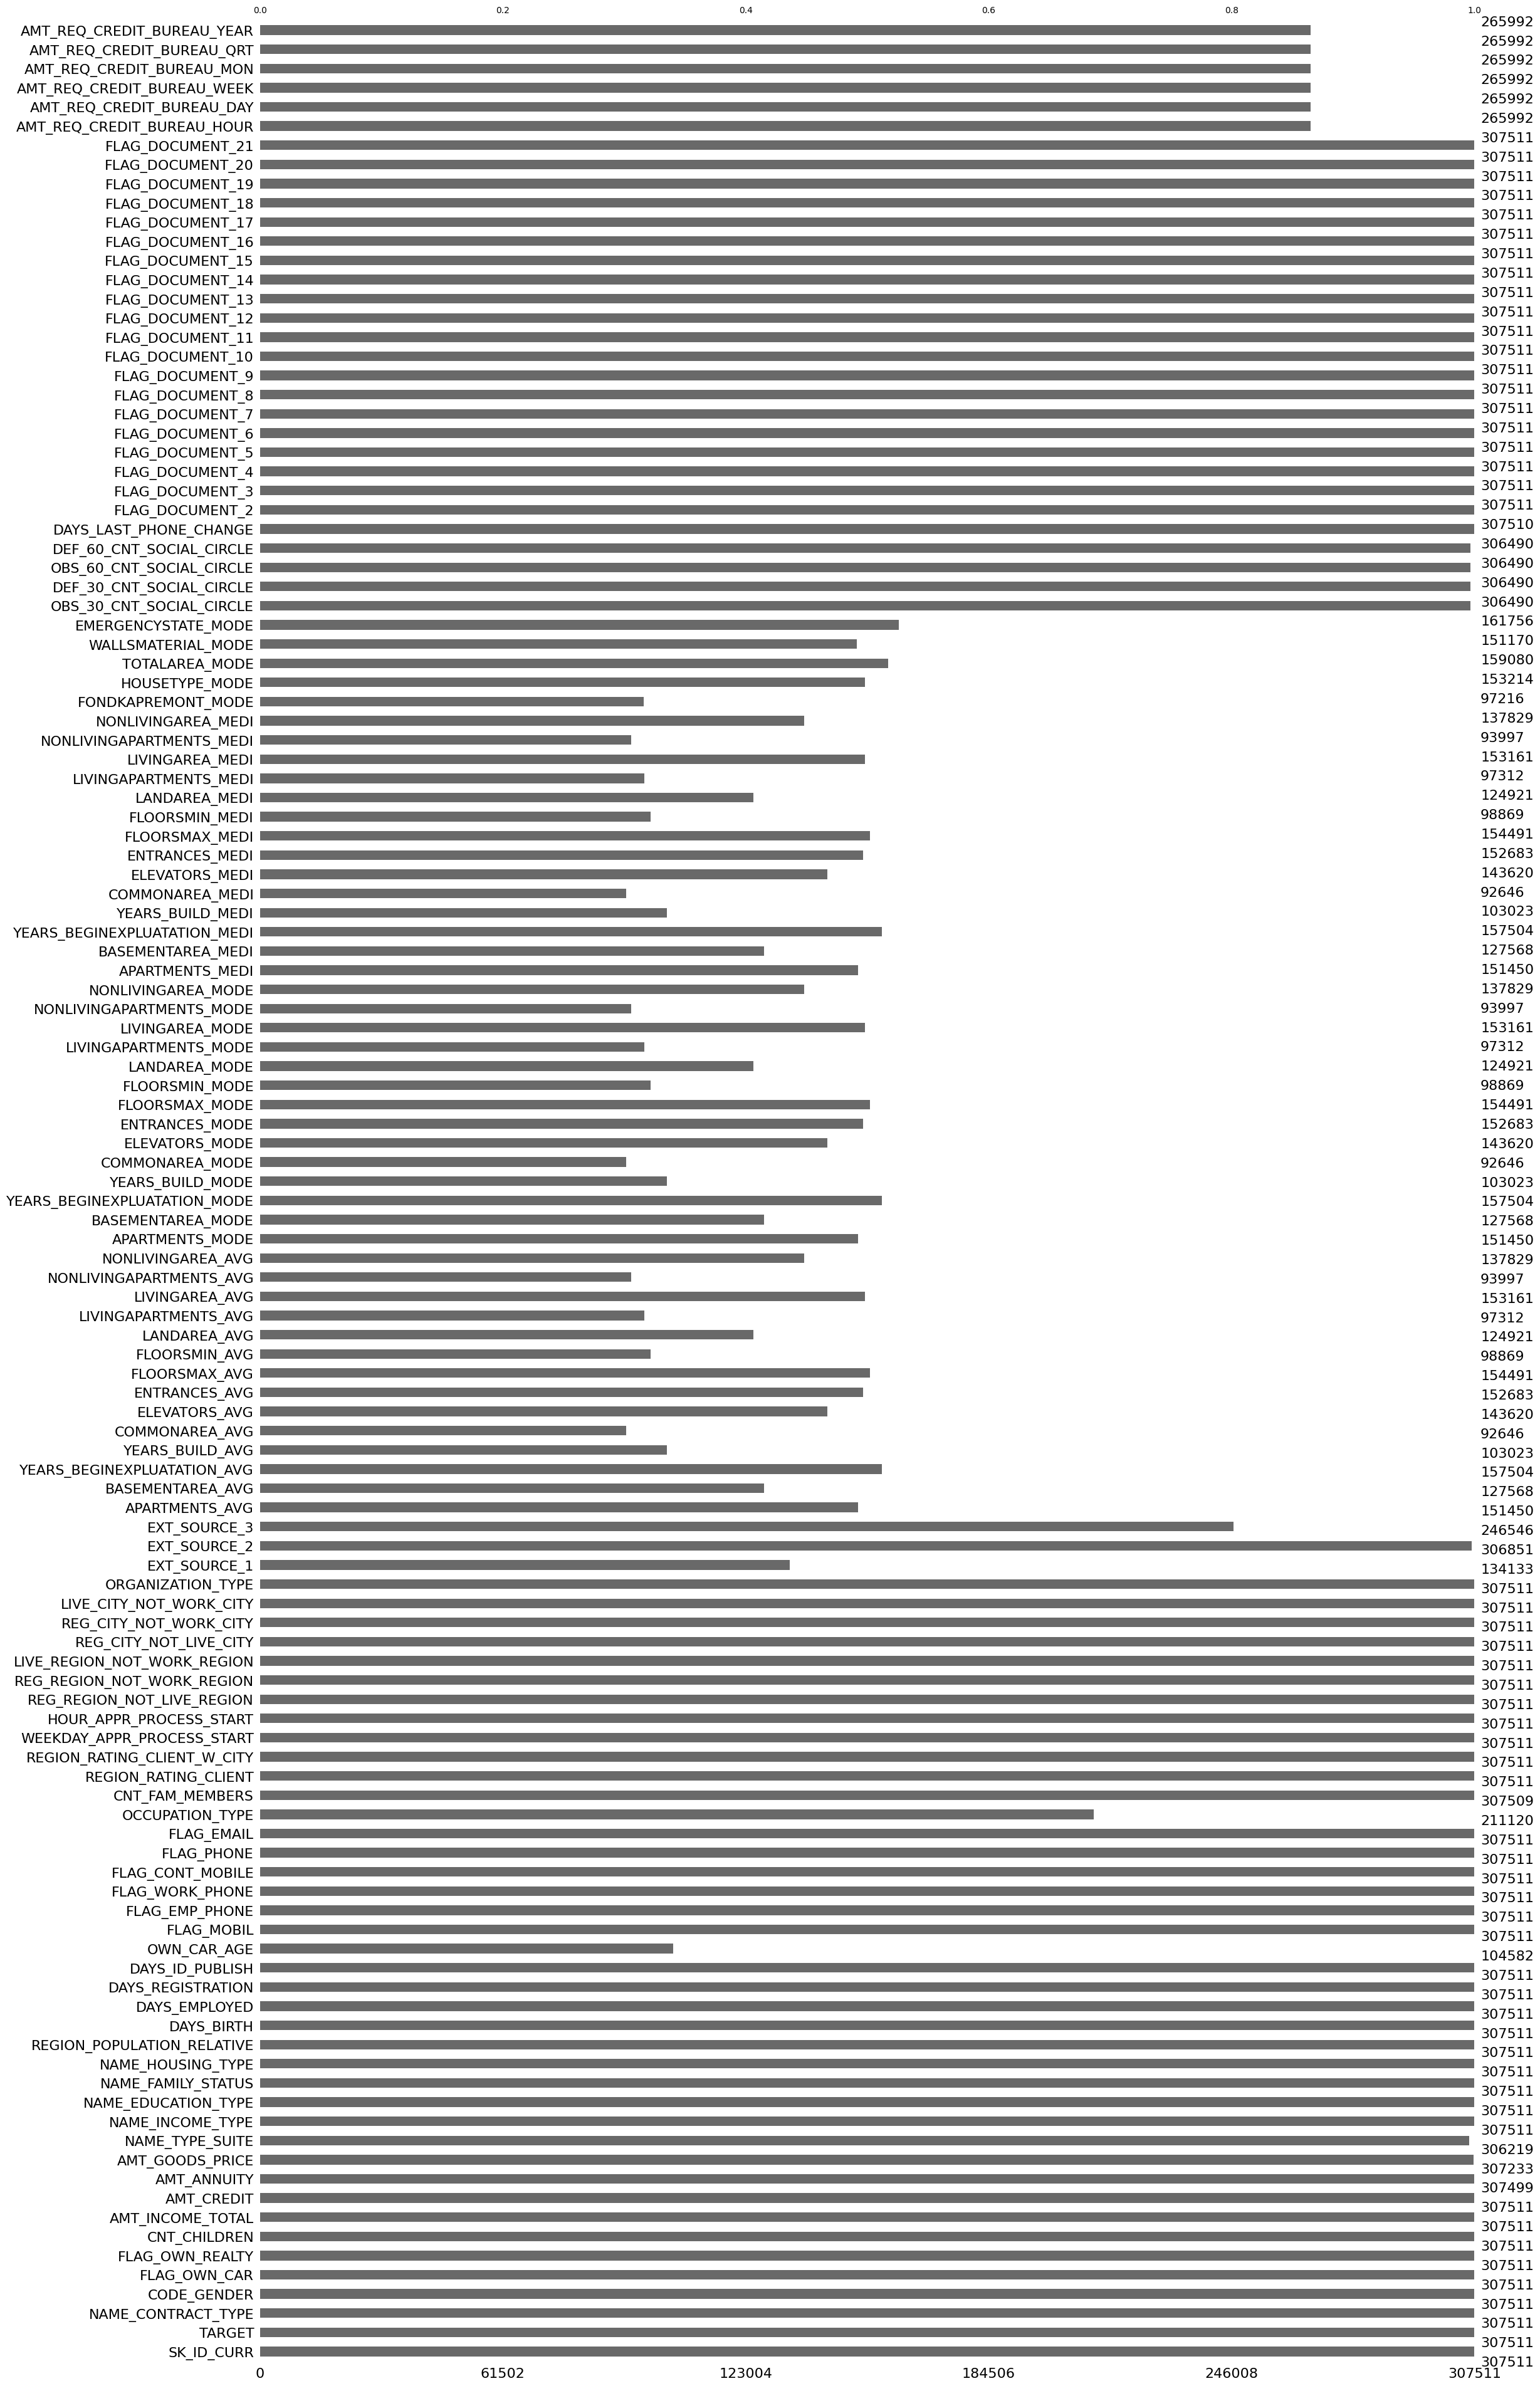

In [77]:
mn.bar(application_df);

Note: lots of missing values
Next: Check what percent of each column is null values

In [78]:
# % null value in each column
round(application_df.isnull().sum() / application_df.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

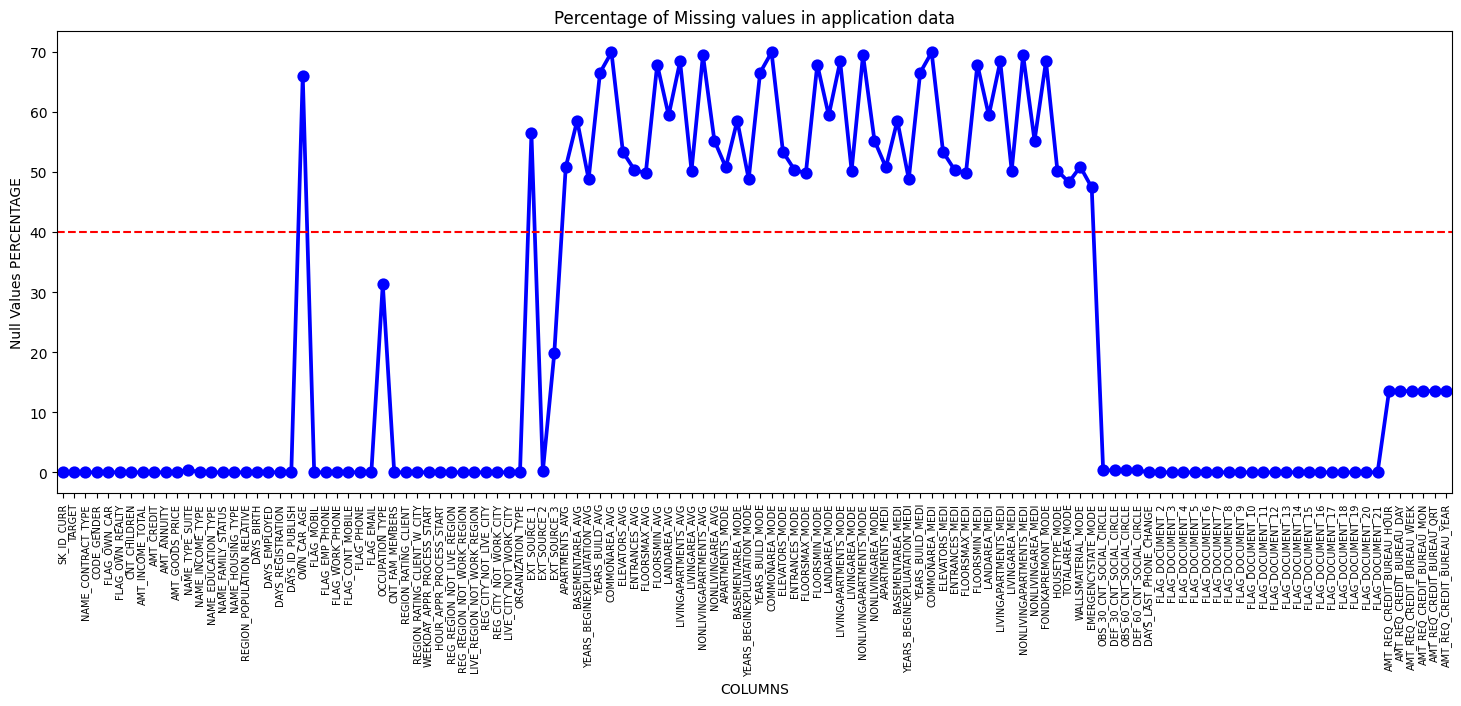

In [79]:
# Plotting the columns vs missing values percentage with 40% being the cut-off marks

null_application_df = pd.DataFrame((application_df.isnull().sum())*100/application_df.shape[0]).reset_index()
null_application_df.columns = ['Column Name', 'Null Values Percentage']


fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",
                   y="Null Values Percentage",
                   data=null_application_df,
                   color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [80]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_application_df[null_application_df["Null Values Percentage"]>=40]
nullcol_40_application

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [81]:
len(nullcol_40_application)

49

## Analyzing and Deleting Unnecessary Columns in application_df

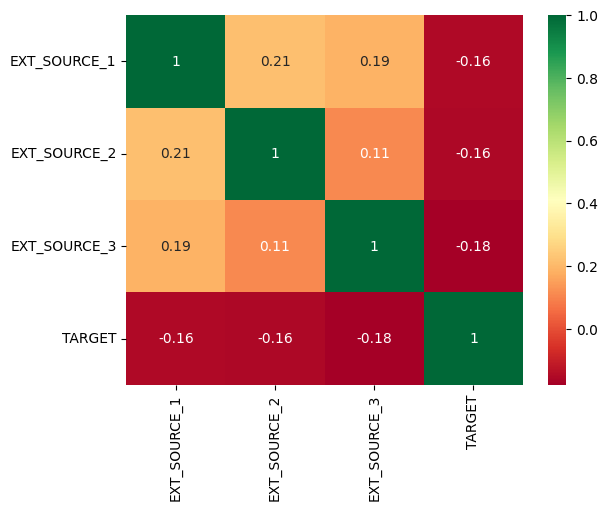

In [82]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = application_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

The heatmap shows that there is almost no correlation between EXT_SOURCE_X and and the target column, so we can drop these rows

In [83]:
# creating a list of columns that need to be dropped including columns with >40% null values

Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

51

/var/folders/dd/bvtg8bfd5yx4dcfdd9pj_yr00000gn/T/ipykernel_15678/3299188982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})


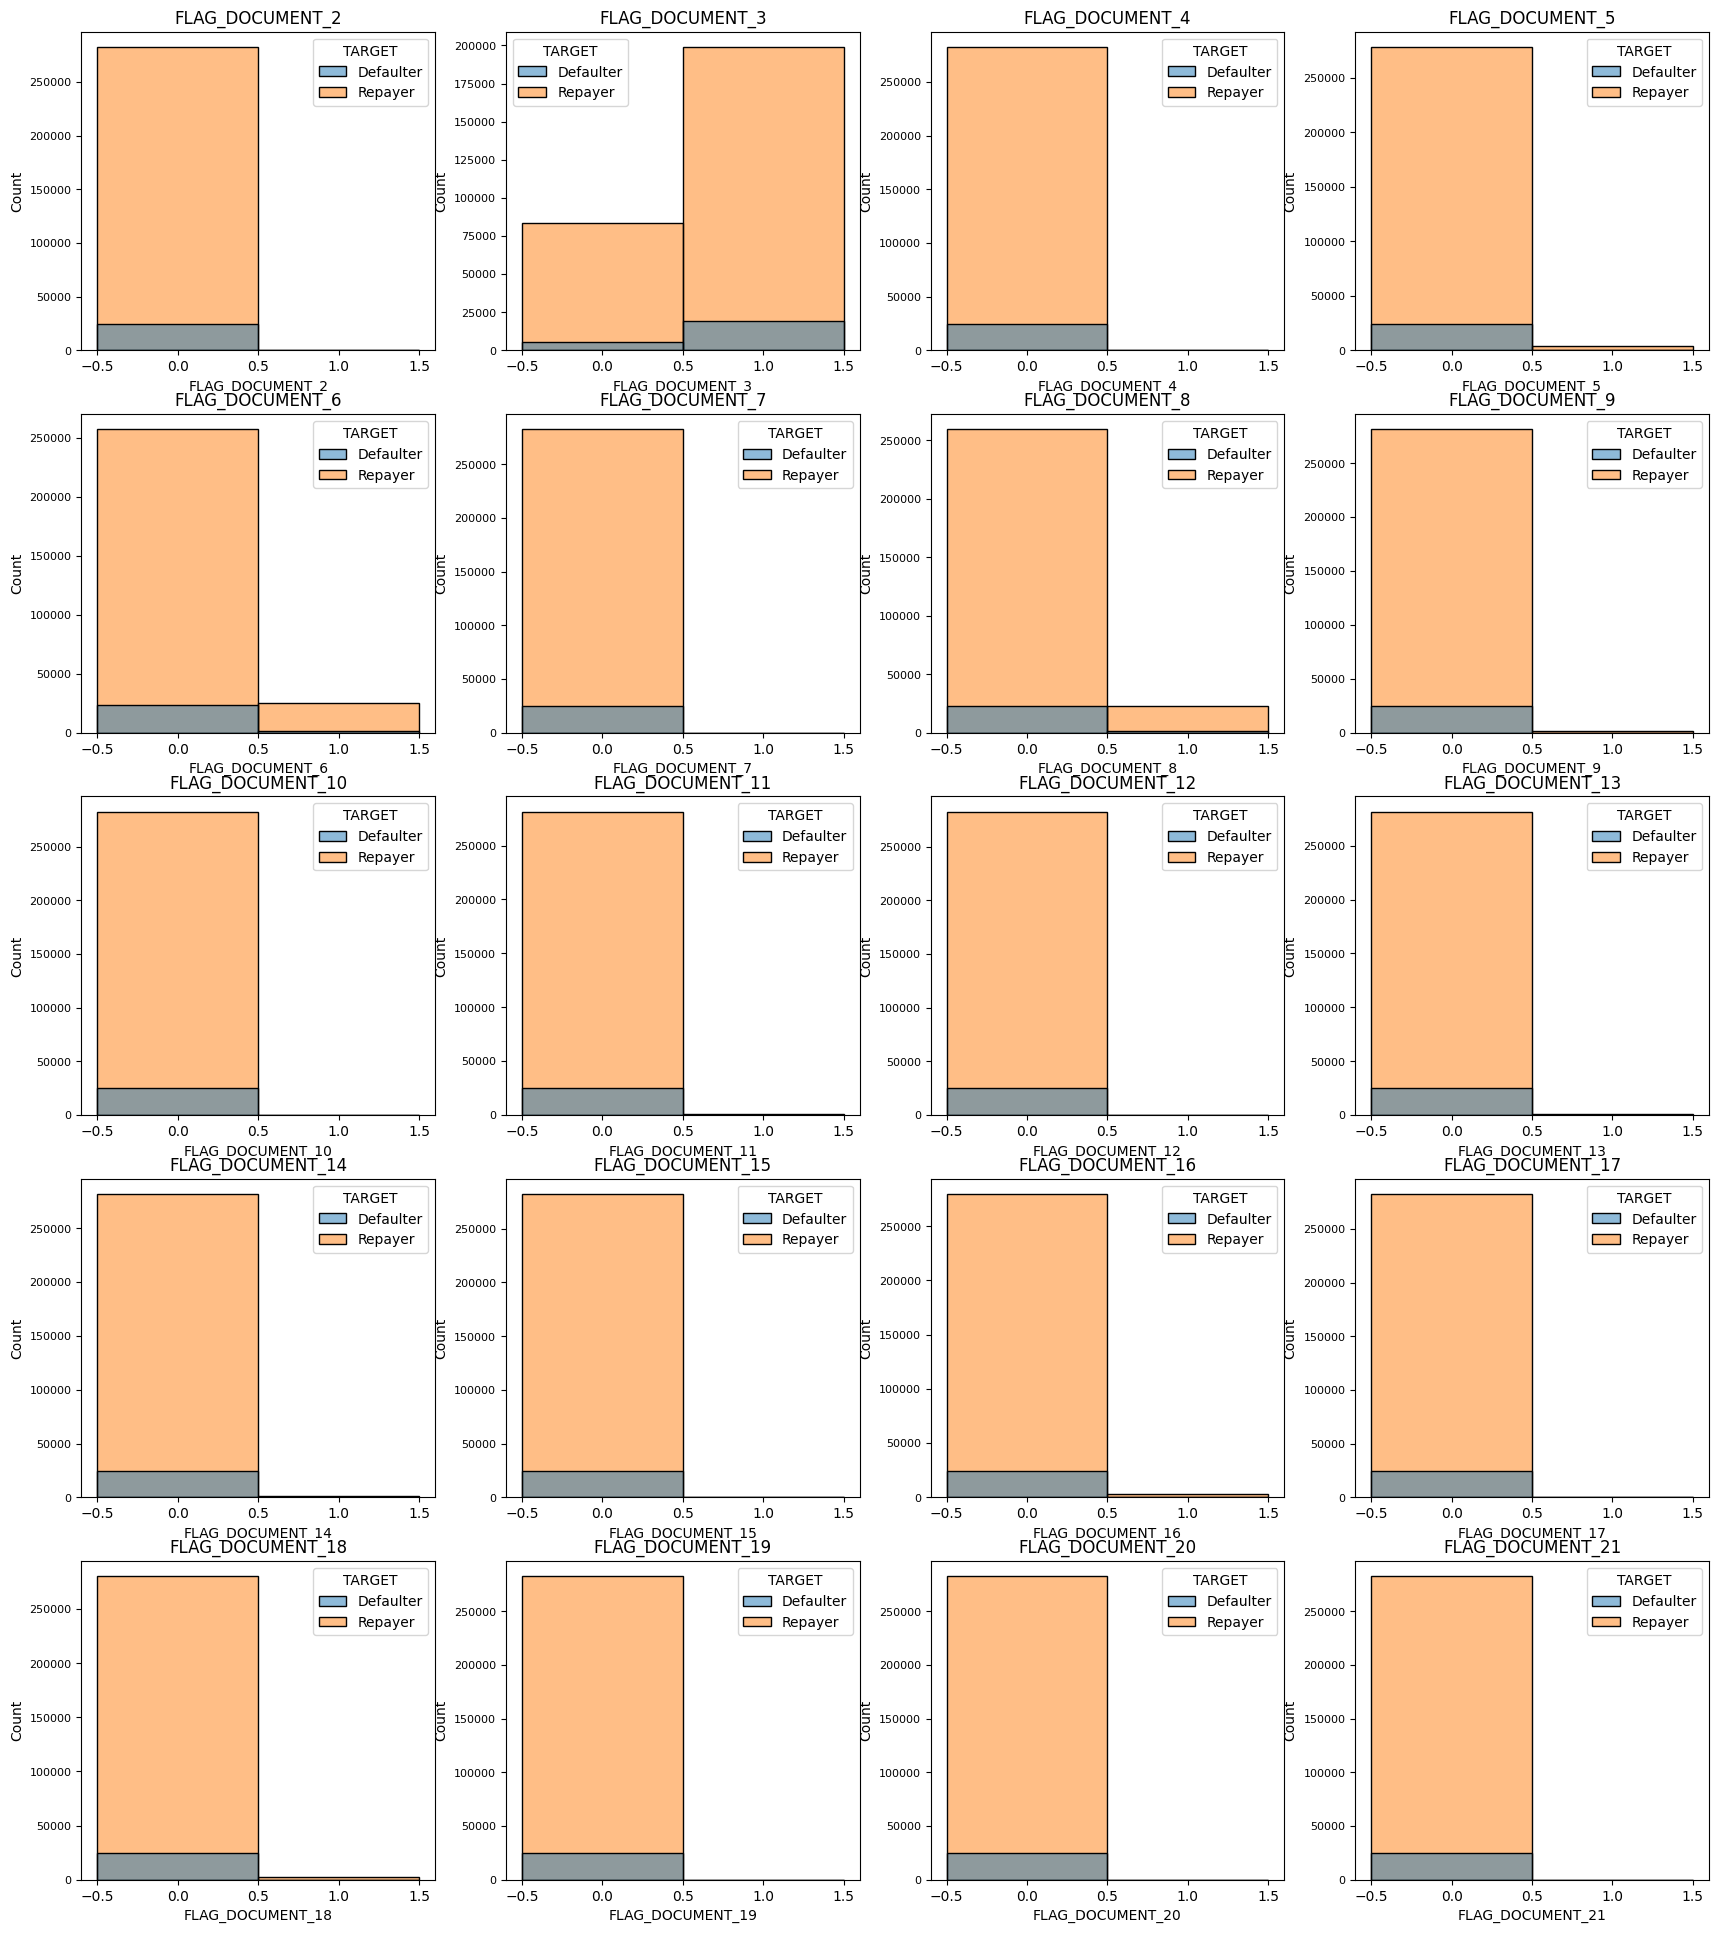

In [84]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = application_df[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.histplot(data=df_flag, x=df_flag[i], hue='TARGET', bins=2, discrete=True)
    plt.yticks(fontsize=8)
    plt.title(i)

The above graphs show that for most loan applications. clients did not submit any documents except for FLAG_DOCUMENT_3. We can delete the other columns, but keep FLAG_DOCUMENT_3. The data suggests that if a client submits FLAG_DOCUMENT_3 it lessens the chance they default because there is a higher number of repayers that submitted the document than those who did not. 

In [85]:
# Including the flag documents for dropping the Document columns

col_Doc.remove('FLAG_DOCUMENT_3')
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

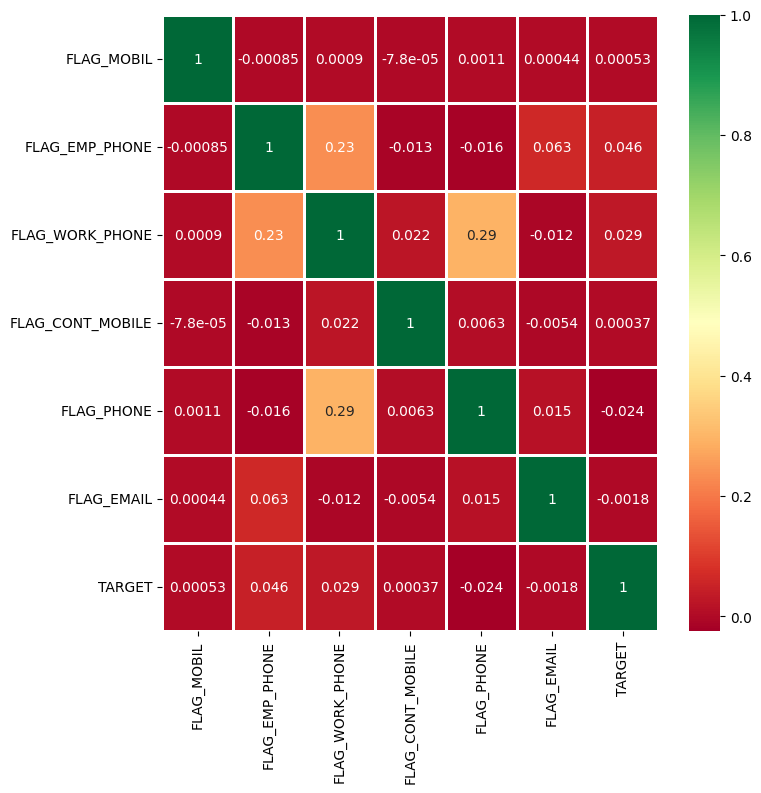

In [86]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = application_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

There is no correlation between flags of mobile phone, email, etc with loan repayment; thus these columns can be deleted

In [87]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

We are going to remove 76 columns from the dataframe

In [88]:
application_df.drop(labels=Unwanted_application, axis=1, inplace=True)

In [89]:
df_dropped = application_df

In [90]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [91]:
null_counts = df_dropped.isnull().sum()
print(null_counts)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [92]:
df_dropped

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.0,0.0,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,6.0,0.0,6.0,0.0,-1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


## Visualizing Some Data

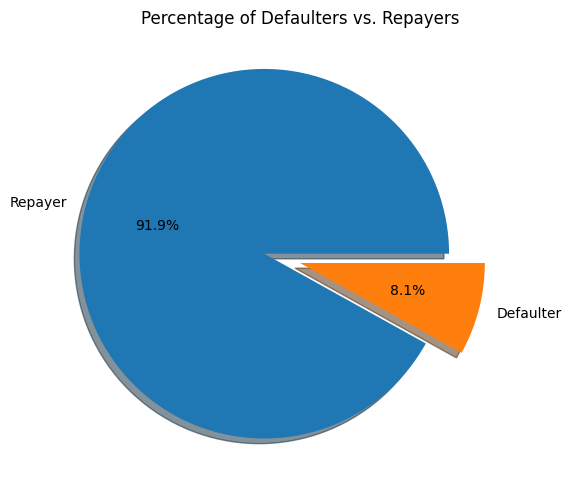

In [93]:
# determining the amount of clients with trouble making payments 
df_piechart = df_dropped['TARGET'].value_counts().reset_index()
df_piechart['TARGET'] = np.where(df_piechart['TARGET'] == 1, "Defaulter", "Repayer")
df_piechart

plt.figure(figsize=(10,6))
plt.pie(df_piechart['count'], 
        labels=df_piechart['TARGET'], 
        autopct='%.1f%%', 
        explode=[0.2, 0],
        shadow=True);
plt.title("Percentage of Defaulters vs. Repayers", loc='center');

Only 8.1% of borrowers defaulted on their loans

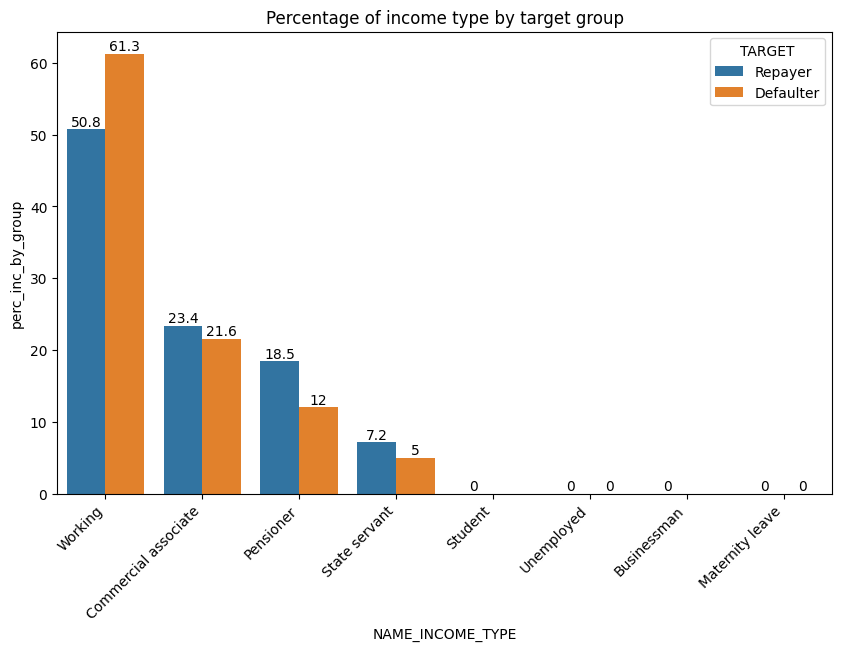

In [94]:
#comparing income types between the two target groups

df_income = df_dropped[['TARGET',
 'NAME_INCOME_TYPE']].groupby(['TARGET']).value_counts().reset_index()

df_sum_income = df_income.groupby(['TARGET']).agg(
    total_income = pd.NamedAgg(column='count', aggfunc='sum')).reset_index()

perc_income = df_income.merge(df_sum_income, on='TARGET')

perc_income['perc_inc_by_group'] = round((perc_income['count'] / perc_income['total_income'] * 100.0), 1)
perc_income['TARGET'] = np.where(perc_income['TARGET'] == 1, "Defaulter", "Repayer")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=perc_income['NAME_INCOME_TYPE'],
    y=perc_income['perc_inc_by_group'],
    hue=perc_income['TARGET'],
    errorbar=None);
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(label='Percentage of income type by target group');

The bar chart shows that the percentage of defaulters is highest for clients with income type 'Working'

/var/folders/dd/bvtg8bfd5yx4dcfdd9pj_yr00000gn/T/ipykernel_15678/2971752611.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_sum_educ = df_educ.groupby(['TARGET']).agg(


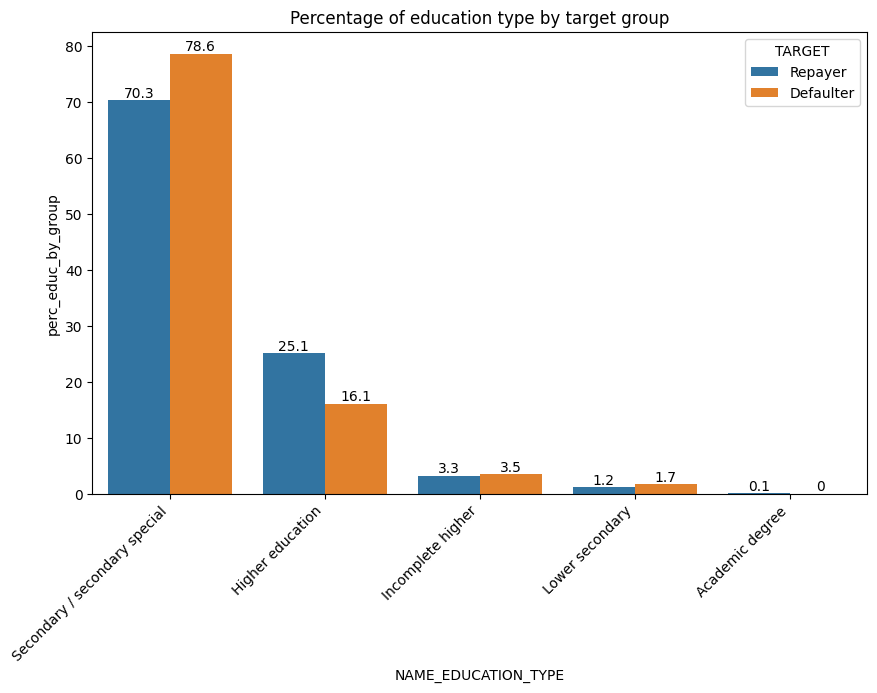

In [95]:
df_educ = df_dropped[['TARGET',
 'NAME_EDUCATION_TYPE']].groupby(['TARGET']).value_counts().reset_index()

df_sum_educ = df_educ.groupby(['TARGET']).agg(
    total_educ = pd.NamedAgg(column='count', aggfunc=sum)).reset_index()

perc_educ = df_educ.merge(df_sum_educ, on='TARGET')

perc_educ['perc_educ_by_group'] = round((perc_educ['count'] / perc_educ['total_educ'] * 100.0),1)
perc_educ['TARGET'] = np.where(perc_educ['TARGET'] == 1, "Defaulter", "Repayer")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=perc_educ['NAME_EDUCATION_TYPE'],
    y=perc_educ['perc_educ_by_group'],
    hue=perc_educ['TARGET'],
    errorbar=('ci', False));
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(label='Percentage of education type by target group');

# The bar chart shows that the percentage of defaulters is highest for clients with education type 'Secondary / secondary special'

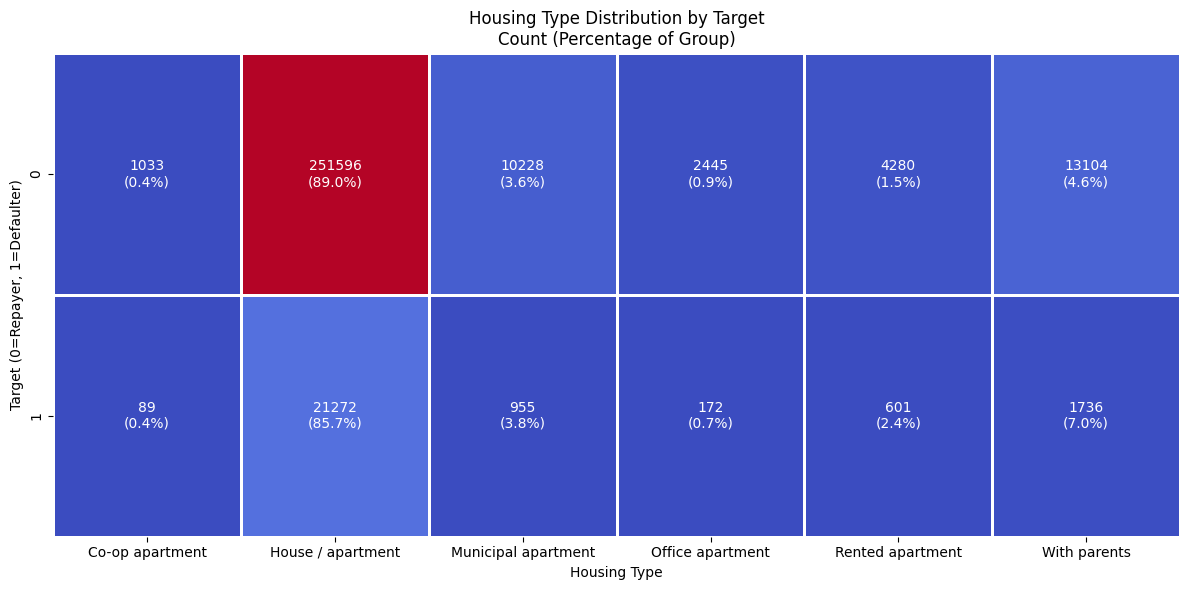

In [96]:
# Grouping by 'TARGET' and 'NAME_FAMILY_STATUS' 
count_df = df_dropped.groupby(['TARGET', 'NAME_HOUSING_TYPE']).size().reset_index(name='count')

# Calculate the total counts for each 'TARGET' group
total_counts = count_df.groupby('TARGET')['count'].transform('sum')

# Calculate the percentage of each 'NAME_HOUSING_TYPE' within each 'TARGET' group
count_df['percent'] = (count_df['count'] / total_counts * 100).round(1)

# Create a new column with the count and percentage for each 'NAME_HOUSING_TYPE'
count_df['label'] = count_df['count'].astype(str) + '\n(' + count_df['percent'].astype(str) + '%)'

# Pivot the data so that 'NAME_HOUSING_TYPE' is the column and 'TARGET' is the index
pivot_count = count_df.pivot(index='TARGET', columns='NAME_HOUSING_TYPE', values='count').fillna(0)
pivot_label = count_df.pivot(index='TARGET', columns='NAME_HOUSING_TYPE', values='label').fillna('')

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    pivot_count, 
    annot=pivot_label.values,  # Use our combined labels
    fmt='',                   # Empty fmt since we pre-formatted
    cmap='coolwarm', 
    cbar = False,
    linewidths=1,
    annot_kws={'ha': 'center', 'va': 'center'}
)

# Set the axis labels and plot title
plt.title('Housing Type Distribution by Target\nCount (Percentage of Group)')
plt.xlabel('Housing Type')
plt.ylabel('Target (0=Repayer, 1=Defaulter)')
plt.tight_layout()
plt.show()

In [97]:
df_dropped[['TARGET', 
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE']].groupby(['TARGET']).mean()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
TARGET,,,,,
0,0.412946,169077.722266,602648.282002,27163.623349,542736.795003
1,0.463807,165611.760906,557778.527674,26481.744290,488972.412554


- The table shows that the average number of children is higher for defaulters than non-defaulters
- However average income, credit amount, annuity amount and goods price is lower for defaulters than non-defaulters

CNT_CHILDREN                AMT_INCOME_TOTAL                                     AMT_CREDIT                                 AMT_ANNUITY                            AMT_GOODS_PRICE                              
               mean median min max             mean    median      min          max           mean    median      min        max          mean   median     min       max            mean    median      min        max
TARGET                                                                                                                                                                                                                 
0          0.412946    0.0   0  19    169077.722266  148500.0  25650.0   18000090.0  602648.282002  517788.0  45000.0  4050000.0  27163.623349  24876.0  1615.5  258025.5   542736.795003  450000.0  40500.0  4050000.0
1          0.463807    0.0   0  11    165611.760906  135000.0  25650.0  117000000.0  557778.527674  497520.0  45000.0  4027680.0  26481.744290  25263.0  2722.5  149211.0   488972.412554  450000.0  45000.0  3600000.0

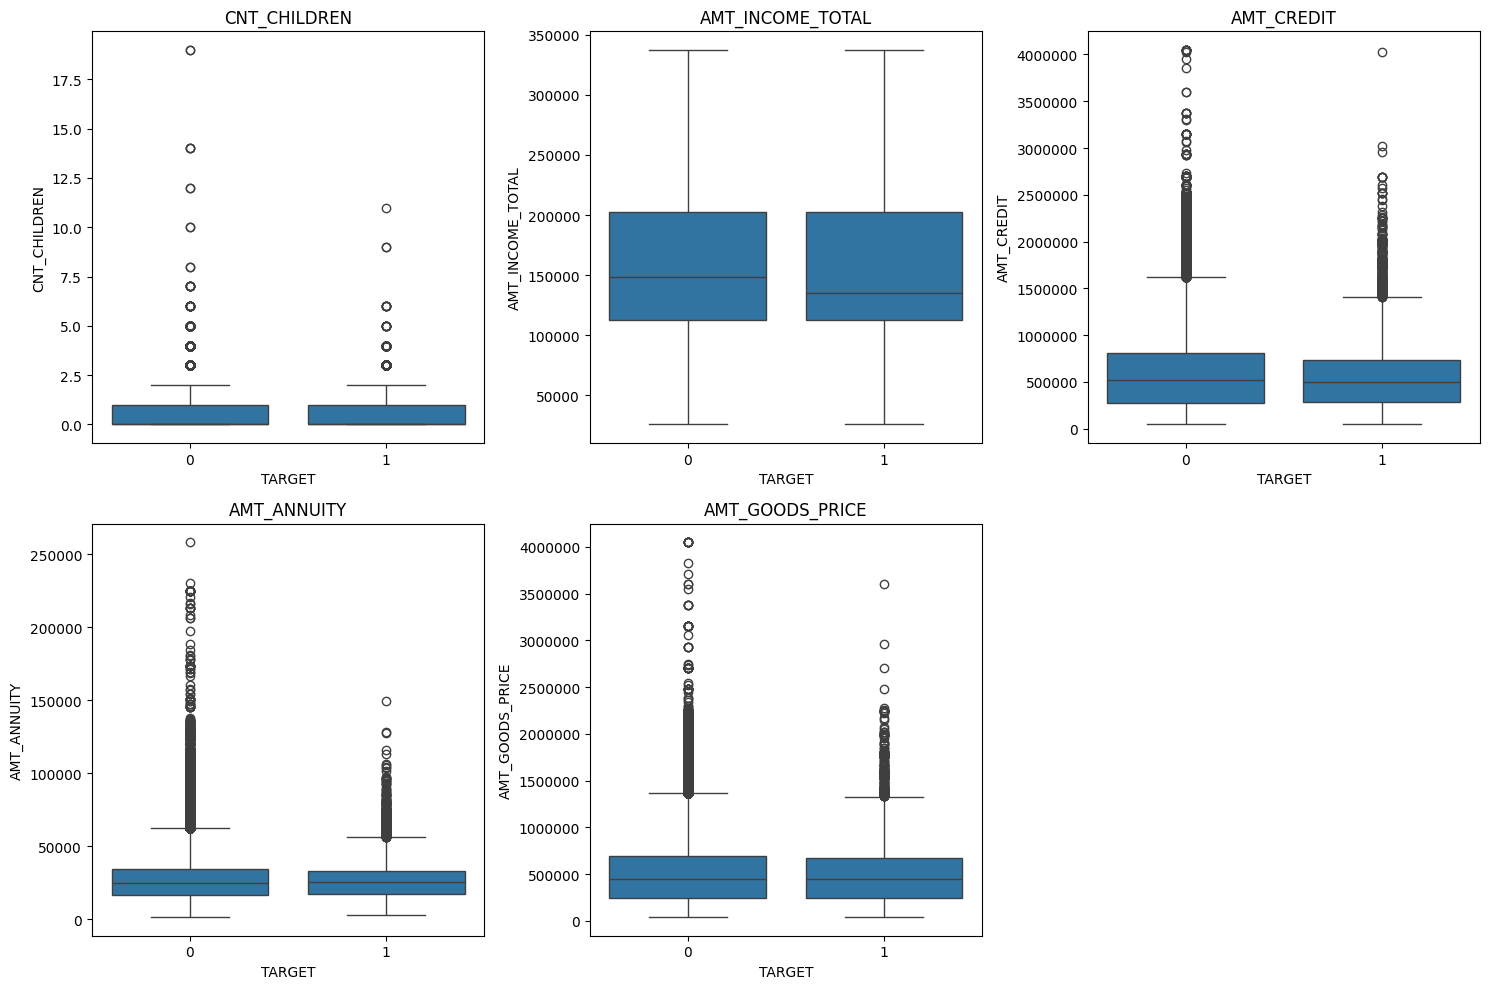

In [98]:
# aggregated table for children, income, credit, annuity, loan amt
agg_df = df_dropped.groupby(['TARGET']).agg(
    {'CNT_CHILDREN': ['mean', 'median', 'min', 'max'],
 'AMT_INCOME_TOTAL': ['mean', 'median', 'min', 'max'],
 'AMT_CREDIT': ['mean', 'median', 'min', 'max'],
 'AMT_ANNUITY': ['mean', 'median', 'min', 'max'],
 'AMT_GOODS_PRICE': ['mean', 'median', 'min', 'max']})
display(agg_df)

plt.figure(figsize=(15, 10))

# Create a boxplot for each column
plt.subplot(2, 3, 1)
sns.boxplot(x='TARGET', y='CNT_CHILDREN', data=df_dropped)
plt.title('CNT_CHILDREN')

plt.subplot(2, 3, 2)
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_dropped, showfliers=False)
plt.title('AMT_INCOME_TOTAL')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 3, 3)
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_dropped)
plt.title('AMT_CREDIT')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 3, 4)
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df_dropped)
plt.title('AMT_ANNUITY')

plt.subplot(2, 3, 5)
sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=df_dropped)
plt.title('AMT_GOODS_PRICE')
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

** note to self: when referencing multiple columns from df you need double brackets

**insights**
- For the dataset, we are going to denote the target variable of value 1 to be individuals that have defaulted on their loan(s).
- Based on the aggregate functions, we can see that defaulters on average have more children, but the median shows that the sample population mostly do not have childern. 
- The median and mean income of loan defaulters is lower than non-defaulters. However, there is one potential major outlier in the loan defaulters group with an income of $117,000,000. Outside of that outlier, the graph for the amount income is comparable between the two groups.
- The median and mean amount of credit is also lower for loan defaulter than that of non-defaulters. From the plot, we can see that non-defaulters interquartile range is larger and skews higher than the defaulters range, but both have relatively similar variablity.
- The mean amount annuity is lower for defaulters and the median amount annuity is higher for defaulters. From the plot, non-defaulters have a much higher spread and variability with significantly more outliers in magnitude. 
- The mean mean good price amount is lower for defaulters with the median amount being the same for defaulters and non-defaulters. From the plot, non-defaulters have a much higher spread and variability with signficiantly more outliers in magnitude.

In [99]:
df_dropped[['TARGET', 
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',]].groupby(['TARGET']).mean()
#check if there are correlated in any way

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
TARGET,,,,
0,1.415742,0.139148,1.398923,0.096688
1,1.496147,0.191980,1.477672,0.138247


- I still don't really know what this means ^ 

In [100]:
df_dropped[['TARGET', 
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].groupby(['TARGET']).mean()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,
0,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199
1,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783


In [101]:
df_dropped[['TARGET', 
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].groupby(['TARGET']).count()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,
0,245459,245459,245459,245459,245459,245459
1,20533,20533,20533,20533,20533,20533


In [102]:
# looking at occupation types grouped by defaulters and non-defaulters
df_occupations = df_dropped[['TARGET', 'OCCUPATION_TYPE']].groupby(['TARGET']).value_counts().reset_index() # note to self: when pandas returns .value_counts() as a series, reset the index to get a dataframe
df_occupations

,TARGET,OCCUPATION_TYPE,count
0,0,Laborers,49348
1,0,Sales staff,29010
2,0,Core staff,25832
3,0,Managers,20043
4,0,Drivers,16496
5,0,High skill tech staff,10679
6,0,Accountants,9339
7,0,Medicine staff,7965
8,0,Security staff,5999
9,0,Cooking staff,5325


In [103]:
# looking at total number of workers for each group
df_sum_workforce = df_occupations.groupby(['TARGET']).agg(
    total_workforce = pd.NamedAgg(column='count', aggfunc='sum')).reset_index()

df_sum_workforce

,TARGET,total_workforce
0,0,192573
1,1,18547


In [104]:
# I want to get a percentage representation of the worker type for each group, I need the total for each group on each row, so I merge the tables on the target group
percentage_workforce = df_occupations.merge(df_sum_workforce, on='TARGET')
percentage_workforce

,TARGET,OCCUPATION_TYPE,count,total_workforce
0,0,Laborers,49348,192573
1,0,Sales staff,29010,192573
2,0,Core staff,25832,192573
3,0,Managers,20043,192573
4,0,Drivers,16496,192573
5,0,High skill tech staff,10679,192573
6,0,Accountants,9339,192573
7,0,Medicine staff,7965,192573
8,0,Security staff,5999,192573
9,0,Cooking staff,5325,192573


In [105]:
# checking that the columns are the correct datatype (int)
percentage_workforce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TARGET           36 non-null     int64 
 1   OCCUPATION_TYPE  36 non-null     object
 2   count            36 non-null     int64 
 3   total_workforce  36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [106]:
# creating the percentage column and also changing the target group from int to identifiable string
percentage_workforce['percentage_workforce_by_group'] = round((percentage_workforce['count'] / percentage_workforce['total_workforce'] * 100.0), 1)
percentage_workforce['TARGET'] = np.where(percentage_workforce['TARGET'] == 1, "Defaulter", "Repayer")
percentage_workforce

,TARGET,OCCUPATION_TYPE,count,total_workforce,percentage_workforce_by_group
0,Repayer,Laborers,49348,192573,25.6
1,Repayer,Sales staff,29010,192573,15.1
2,Repayer,Core staff,25832,192573,13.4
3,Repayer,Managers,20043,192573,10.4
4,Repayer,Drivers,16496,192573,8.6
5,Repayer,High skill tech staff,10679,192573,5.5
6,Repayer,Accountants,9339,192573,4.8
7,Repayer,Medicine staff,7965,192573,4.1
8,Repayer,Security staff,5999,192573,3.1
9,Repayer,Cooking staff,5325,192573,2.8


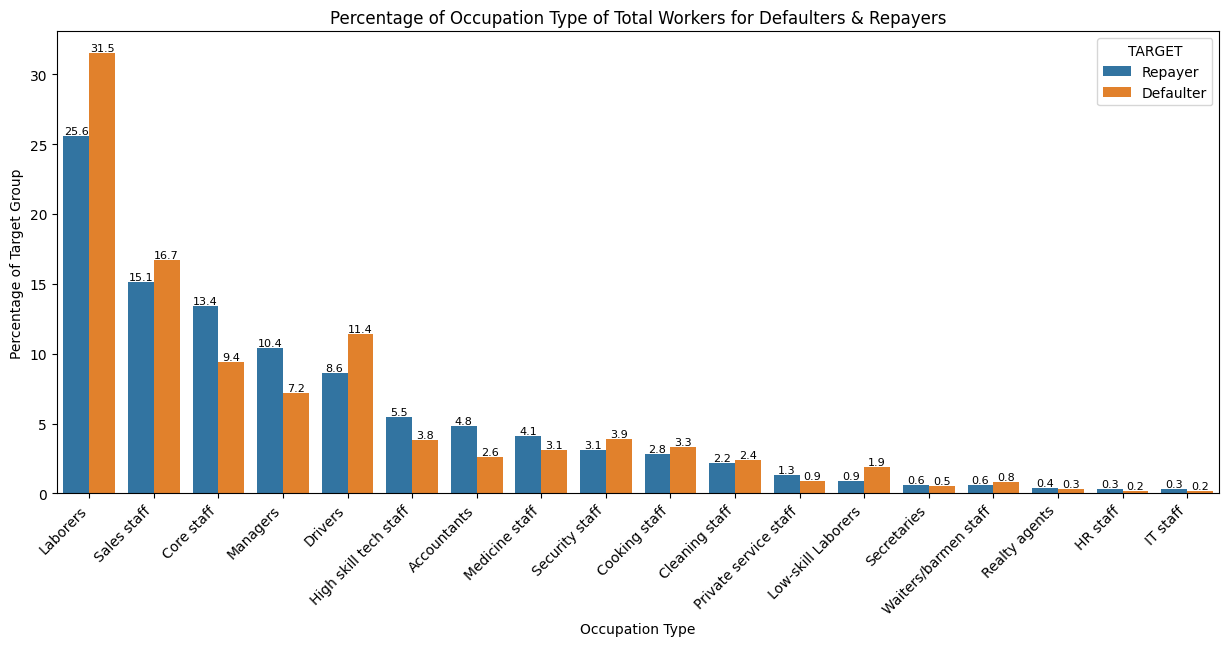

In [107]:
plt.figure(figsize=(15,6))
ax = sns.barplot(
    x=percentage_workforce['OCCUPATION_TYPE'],
    y=percentage_workforce['percentage_workforce_by_group'],
    hue=percentage_workforce['TARGET'],
    errorbar=('ci', False));
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)

plt.xticks(rotation=45, horizontalalignment='right');
plt.title("Percentage of Occupation Type of Total Workers for Defaulters & Repayers")
plt.ylabel('Percentage of Target Group')
plt.xlabel('Occupation Type');

The data indicates that the distribution of occupations among those who took out loans are similar, however, it seems that out of those who are making late payments, laborers make up a higher percentage

We should look more closely at occupation type and how it affects loan payments, maybe more caution should be taken with laborers

<h4>Numerical columns correlation tests</h4>

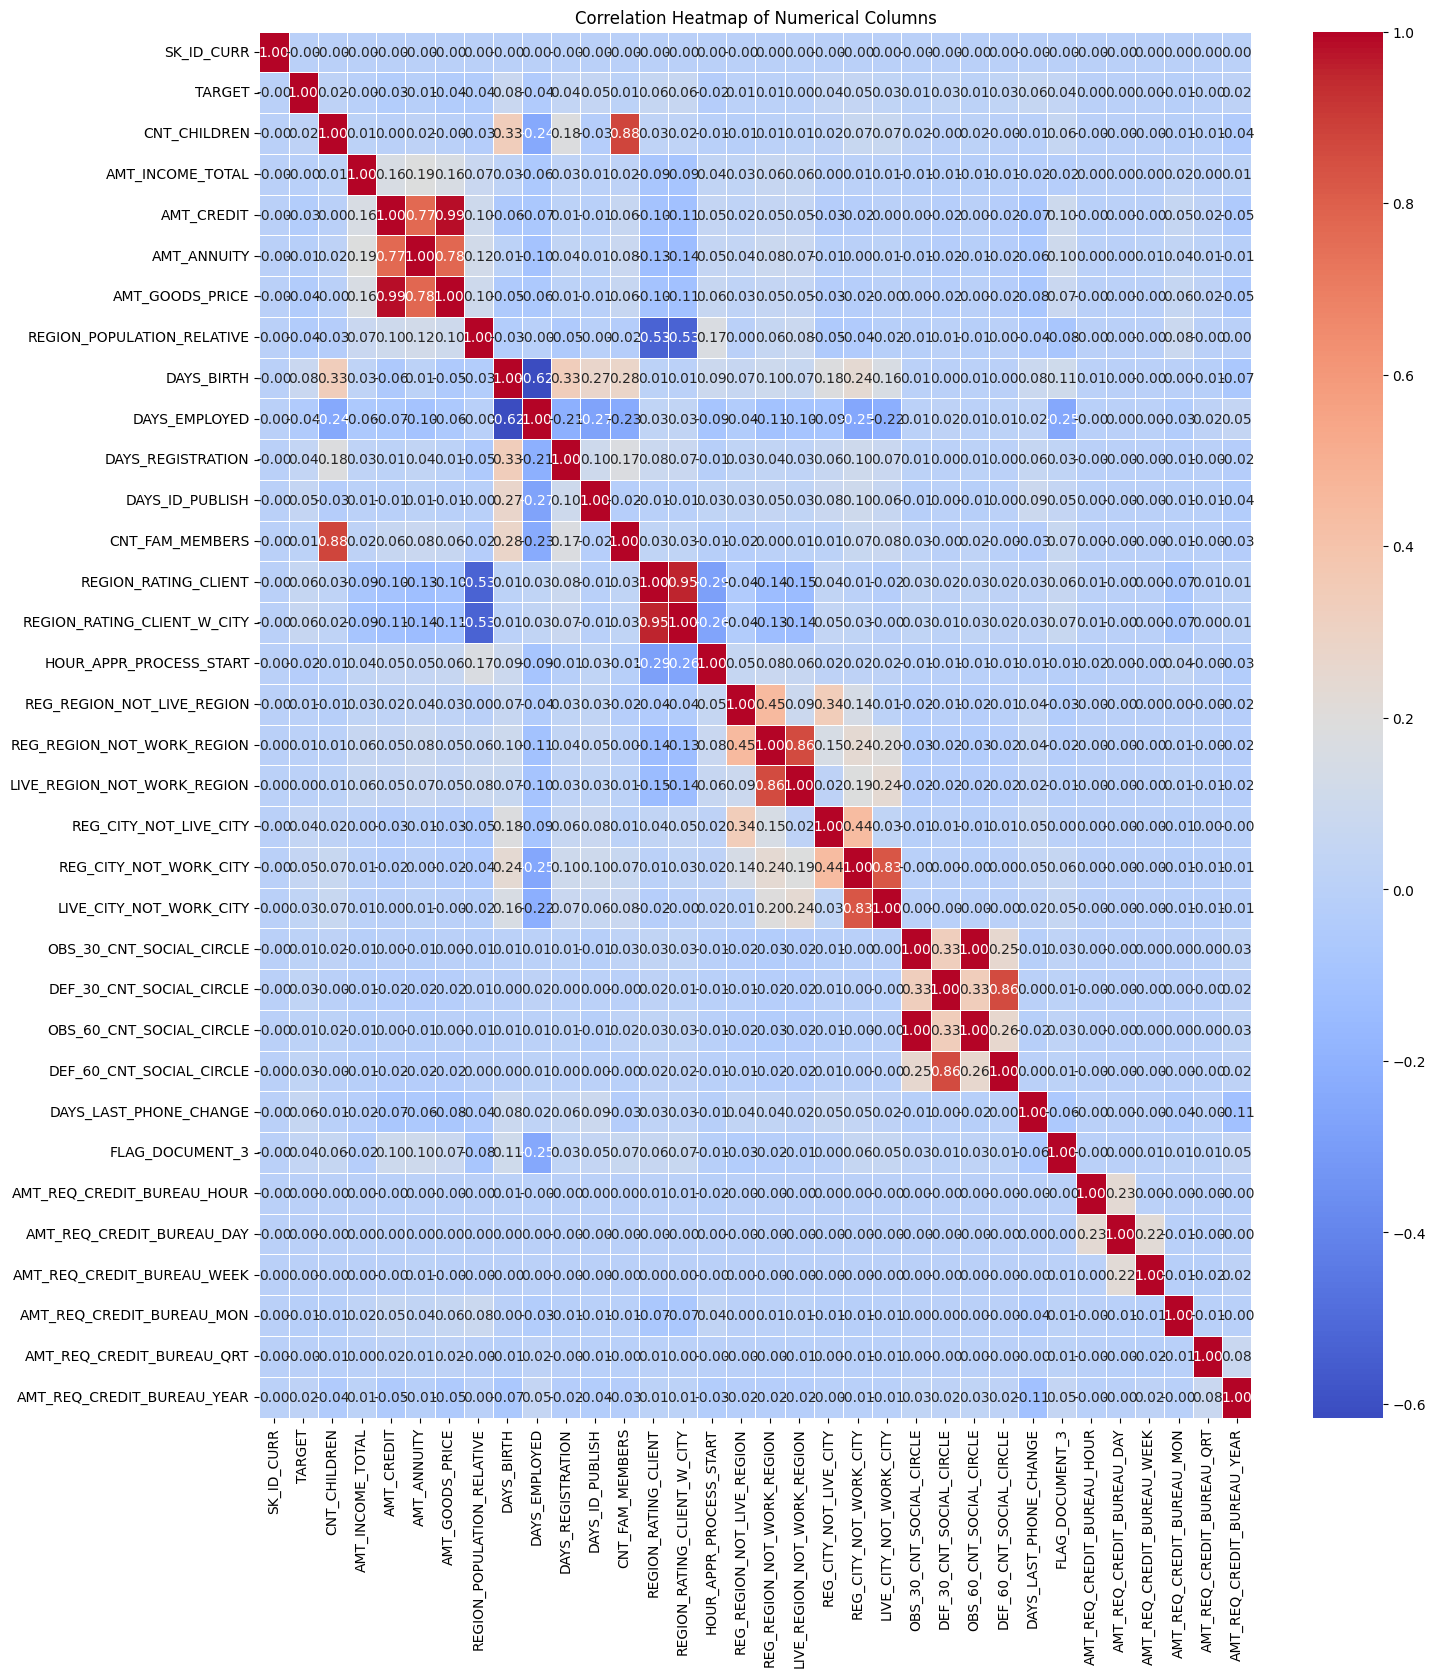

In [108]:
# Correlation matrices of numerical variables
df_numerical = df_dropped.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(16, 18))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.4);
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# print(df_dropped['HOUR_APPR_PROCESS_START'])
# Note: Hour appr process start is a categorical variable, so it should be converted to a categorical variable

We see that from the correlation matrix that there is a strong correlation between the following variables:Amount Credit and amount good price, count of children and count of family members, region rating cliend and region rating client with city, registered region but not working region and living region but not working region, observed 30 count social circle and observed 60 count social circle, default 30 count social circle and default 60 count social circle.

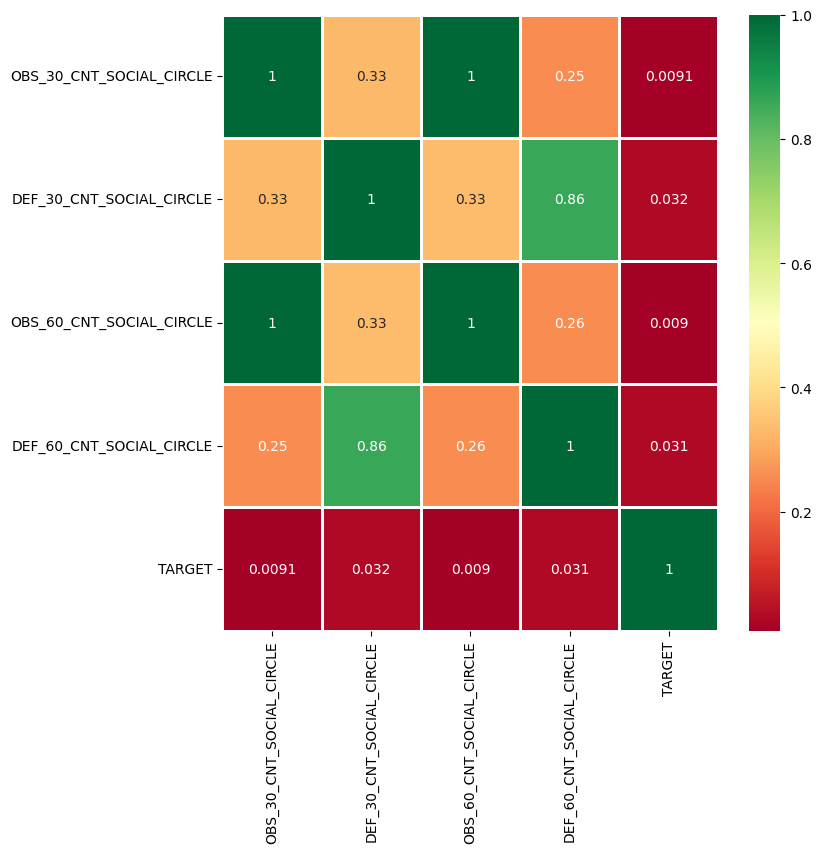

In [109]:
contact_col = ['OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET']
Contact_corr = df_dropped[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

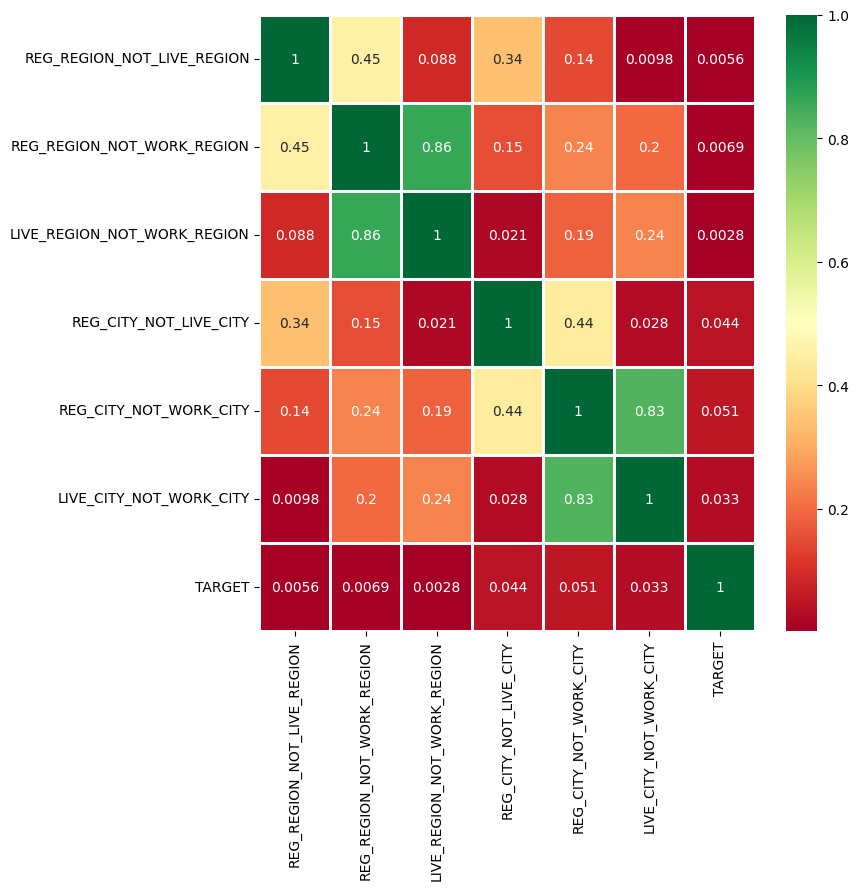

In [110]:
contact_col = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TARGET']
Contact_corr = df_dropped[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

<h4> Categorical columns correlation/association tests</h4>

We are checking to see if any of the categorical columns are associated with one another to possibly remove some because we are planning on doing one-hot encoding, which will take up a lot of data with a set of this size

In [111]:
# # Correlation of categorical variables
# # Convert hour approximately application start to categorical
# df_dropped['HOUR_APPR_PROCESS_START'] = df_dropped['HOUR_APPR_PROCESS_START'].astype('object')
# print(df_dropped.select_dtypes(include=['object']).columns)

# def cramers_v(x,y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2,_,_,_ = chi2_contingency(confusion_matrix)

In [112]:
# creating a dataframe with only the columns that contain strings
df_categorical = df_dropped.select_dtypes(include=['object'])
list_categorical = list(df_categorical.columns)
list_categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

<h5>Chi-squared</h5>

In [113]:
# chi squared example
crosstab_result = pd.crosstab(index=df_dropped['CODE_GENDER'], columns=df_dropped['FLAG_OWN_REALTY'])
chisq = scipy.stats.chi2_contingency(crosstab_result)
chisq.statistic


np.float64(607.2706007681655)

In [114]:
# function to find the correlation between all the categorical variables and appending that result into a datafram
def categorical_corr_chisq(columns_list):
    list = []
    for col_one in columns_list:
        for col_two in columns_list:
            crosstab_result = pd.crosstab(index=df_dropped[col_one], columns=df_dropped[col_two])
            chisq = scipy.stats.chi2_contingency(crosstab_result)

            list.append({'col_one': col_one, 'col_two': col_two, 'p-value': chisq.pvalue})

            # print("The association variable between",crosstab_result.index.name,"and",crosstab_result.columns.name,"is:",round(association_metric*100, 2))
    return pd.DataFrame(list)

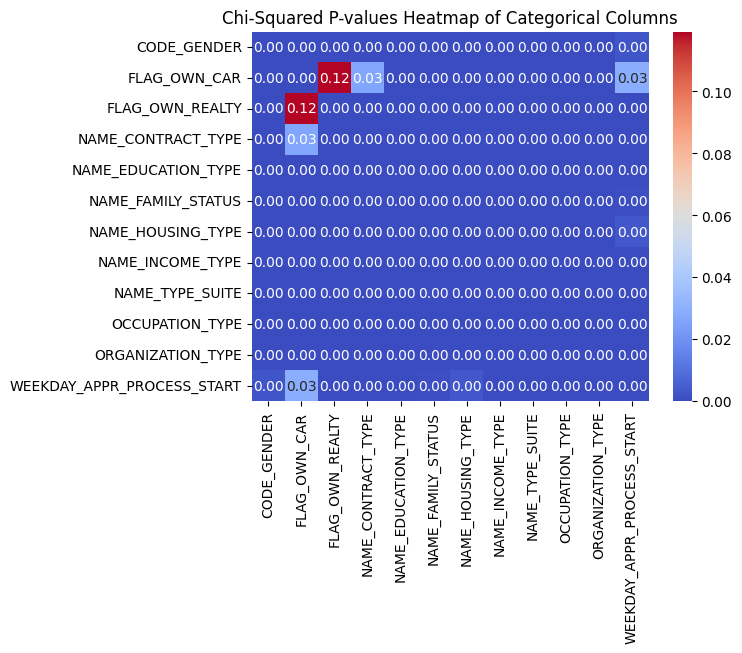

In [115]:
# calling the function and pivoting the table to a format the heatmap function can use
categorical_df_chisq = categorical_corr_chisq(list_categorical)

categorical_map_cramers = categorical_df_chisq.pivot(index='col_one', columns='col_two', values='p-value')

# creating a heatmap for the correlation of the categorical variables
ax = sns.heatmap(categorical_map_cramers, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Chi-Squared P-values Heatmap of Categorical Columns')
ax.set(xlabel='', ylabel='');

Based on the results of the chi-squared test, we can see that the only test where we must Fail to Reject the Null Hypothesis is between FLAG_OWN_CAR and FLAG_OWN_REALTY. In all other cases we Reject the Null Hypothesis showing that the results of the following Cramer's V association test are significant and interpretable.

<h5>Cramer's V</h5>

In [116]:
# Cramer's V example

crosstab_result_edu_v_occ = pd.crosstab(index=df_dropped['NAME_EDUCATION_TYPE'], columns=df_dropped['OCCUPATION_TYPE'])
association_metric = scipy.stats.contingency.association(crosstab_result_edu_v_occ)

print("The association variable between",crosstab_result_edu_v_occ.index.name,"and",crosstab_result_edu_v_occ.columns.name,"is:",association_metric)

The association variable between NAME_EDUCATION_TYPE and OCCUPATION_TYPE is: 0.21909238676253232


In [117]:
# function to find the correlation between all the categorical variables and appending that result into a datafram
def categorical_corr_cramers(columns_list):
    list = []
    for col_one in columns_list:
        for col_two in columns_list:
            crosstab_result = pd.crosstab(index=df_dropped[col_one], columns=df_dropped[col_two])
            association_metric = scipy.stats.contingency.association(crosstab_result, method='cramer')

            list.append({'col_one': col_one, 'col_two': col_two, 'assc': association_metric})

            # print("The association variable between",crosstab_result.index.name,"and",crosstab_result.columns.name,"is:",round(association_metric*100, 2))
    return pd.DataFrame(list)

In [118]:
# calling the function and pivoting the table to a format the heatmap function can use
categorical_df_cramers = categorical_corr_cramers(list_categorical)

categorical_map_cramers = categorical_df_cramers.pivot(index='col_one', columns='col_two', values='assc')

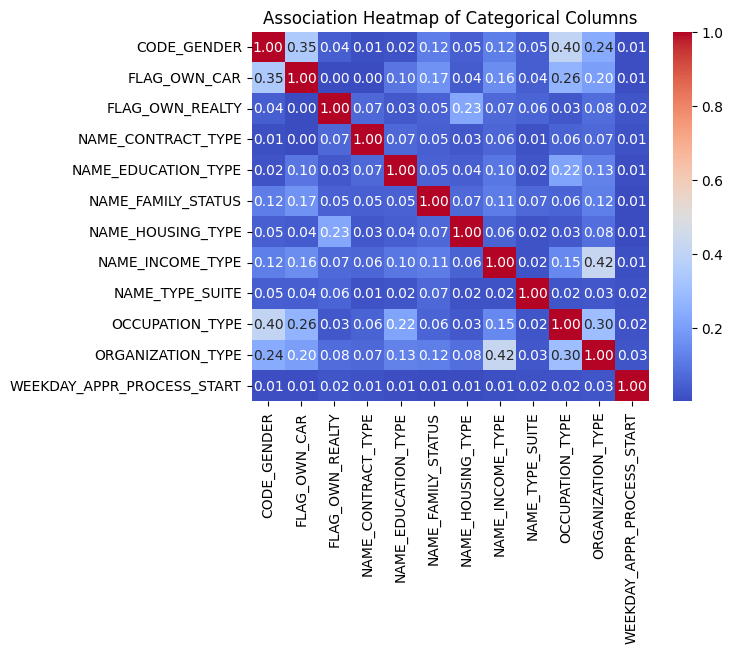

In [119]:
# creating a heatmap for the correlation of the categorical variables
ax = sns.heatmap(categorical_map_cramers, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Association Heatmap of Categorical Columns')
ax.set(xlabel='', ylabel='');

- where I found this strat: https://stackoverflow.com/questions/74411668/how-to-calculate-the-correlation-between-two-categorical-variables-in-python
- Cramer's V explanation: https://www.reddit.com/r/explainlikeimfive/comments/a0igip/eli5_what_does_cramers_v_actually_measure_and/

The results of the Cramer's V test show that most categorical variables are not associated with one another. There are slight associations between...
- FLAG_OWN_CAR and CODE_GENDER
- OCCUPATION_TYPE and CODE_GENDER
- ORGANIZATION_TYPE and NAME_INCOME_TYPE
    - This makes sense because a clients income type is often dependent on the type of organizationt they work for 

In [120]:
# # Convert days birth and days employed to years
# df_dropped['DAYS_BIRTH'] = abs(df_dropped['DAYS_BIRTH']) // 365
# df_dropped.rename(columns = {'DAYS_BIRTH':'Age_years'}, inplace = True)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')


/var/folders/dd/bvtg8bfd5yx4dcfdd9pj_yr00000gn/T/ipykernel_15678/48051326.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binaries.dropna(inplace=True)
/var/folders/dd/bvtg8bfd5yx4dcfdd9pj_yr00000gn/T/ipykernel_15678/48051326.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binaries.drop(df_binaries[df_binaries['CODE_GENDER'] == 'XNA'].index, inplace=True)


Text(0.5, 1.0, 'Phi Coefficient Correlation Matrix')

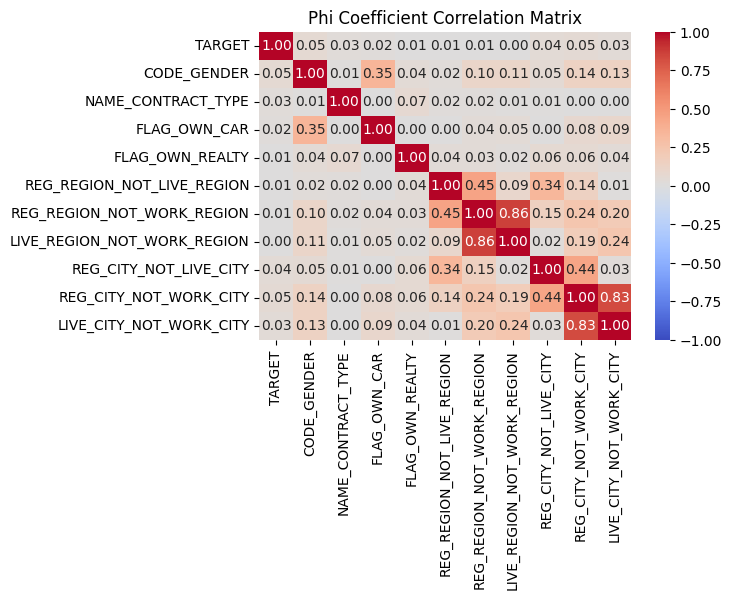

In [121]:
# Correlation of binary categorical variables
# Convert hour approximately application start to categorical
df_dropped['HOUR_APPR_PROCESS_START'] = df_dropped['HOUR_APPR_PROCESS_START'].astype('object')
print(df_dropped.select_dtypes(include=['object']).columns)

def is_binary(series):
    return series.nunique() == 2

df_dropped.pipe(is_binary)
# Name_CONTRACT_TYPE: Cash loans or revolving loans
# Flag_OWN_CAR: Yes or No
# Flag_OWN_REALTY: Yes or No
# Flag_WORK_PHONE: 1 or 0
# REG_REGION_NOT_LIVE_REGION: 1 or 0     
# REG_REGION_NOT_WORK_REGION: 1 or 0
# LIVE_REGION_NOT_WORK_REGION: 1 or 0
# REG_CITY_NOT_LIVE_CITY: 1 or 0
# REG_CITY_NOT_WORK_CITY: 1 or 0  
# LIVE_CITY_NOT_WORK_CITY: 1 or 0
# POTENTIALLY GENDER, might have to drop some rows that put XNA M and F



def phi_coefficient(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / n)


binary_columnns = ['TARGET','CODE_GENDER','NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df_binaries = df_dropped[binary_columnns]
df_binaries.dropna(inplace=True)
df_binaries.drop(df_binaries[df_binaries['CODE_GENDER'] == 'XNA'].index, inplace=True)

binary_correlation_matrix = pd.DataFrame(index=df_binaries.columns, columns=df_binaries.columns)

for col1 in df_binaries.columns:
    for col2 in df_binaries.columns:
        binary_correlation_matrix.loc[col1, col2] = phi_coefficient(df_binaries[col1], df_binaries[col2])

plt.figure(figsize=(6, 4))
sns.heatmap(
    binary_correlation_matrix.astype(float), 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1,
    fmt=".2f"
)
plt.title("Phi Coefficient Correlation Matrix")

We can see that there is correlation between REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION and REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY

In [122]:
# # Convert days birth and days employed to years
# df_dropped['DAYS_BIRTH'] = abs(df_dropped['DAYS_BIRTH']) // 365
# df_dropped.rename(columns = {'DAYS_BIRTH':'AGE_YEARS'}, inplace = True)

# df_dropped['DAYS_EMPLOYED'] = abs(df_dropped['DAYS_EMPLOYED']) // 365
# df_dropped.rename(columns = {'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace = True)

# Just might not be necessary

## Removing Redundant Columns

- Dropping AMT_GOODS_PRICE in favor of AMT_CREDIT because they are highly correlated and AMT_CREDIT has less null values
- Dropping CNT_CHILDREN in favor of CNT_FAMILY because CNT_FAMILY is inclusive of the number of children
- Dropping REGION_RATING_CLIENT in favor of REGION_RATING_CLIENT_W_CITY because they are highly correlated
- Dropping REG_CITY_NOT_WORK_CITY in favor of LIVE_CITY_NOT_WORK_CITY because they are highly correlated and it seems that the registration city is often the city the client lives in
- Dropping OBS_30_CNT_SOCIAL in favor of OBS_60_CNT_SOCIAL
- Dropping DEF_30_CNT_SOCIAL in favor of DEF_60_CNT_SOCIAL

In [127]:
df_dropped

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,School,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,Government,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,Business Entity Type 3,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,Religion,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,THURSDAY,15,0,0,0,0,0,Services,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1.0,2,MONDAY,8,0,0,0,0,0,XNA,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,3,THURSDAY,9,0,0,0,0,1,School,6.0,0.0,-1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,2,WEDNESDAY,9,0,0,0,1,0,Business Entity Type 1,0.0,0.0,-322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
redundant_columns = ['AMT_GOODS_PRICE', 'CNT_CHILDREN','REGION_RATING_CLIENT',
                     'REG_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']

In [129]:
df_dropped.drop(labels=redundant_columns, axis=1, inplace=True)

KeyError: "['AMT_GOODS_PRICE', 'CNT_CHILDREN', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'] not found in axis"

In [ ]:
refined_df = df_dropped

## Filling in Null Values

In [130]:
# viewing the number of null values in each column
null_counts = df_dropped.isnull().sum()
print(null_counts)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

In [131]:
# Fill in data on Pensioners
null_in_col2 = df_dropped[df_dropped['OCCUPATION_TYPE'].isna()]
col1_distribution = null_in_col2['NAME_INCOME_TYPE'].value_counts(dropna=False)  # includes nulls in Occupation Type if present
print("When Occulation Type is null, Income Type contains:")
print(col1_distribution)

count = (df_dropped['NAME_INCOME_TYPE'] == 'Pensioner').sum()
print(count)

pensioners_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'Pensioner']
occupation_distribution = pensioners_data['OCCUPATION_TYPE'].value_counts(dropna=False)  # Includes NaN if present

print("Distribution of Occupation Type values for 'pensioners' in Income Type:")
print(occupation_distribution)

worker_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'Working']
occupation_distribution = worker_data['OCCUPATION_TYPE'].value_counts(dropna=False)  # Includes NaN if present

print("Distribution of Occupation Type values for 'Working' in Income Type:")
print(occupation_distribution)

commercial_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'Commercial associate']
occupation_distribution_distribution = commercial_data['OCCUPATION_TYPE'].value_counts(dropna=False)  # Includes NaN if present

print("Distribution of Occupation Type values for 'Commercial Associate' in Income Type:")
print(occupation_distribution)

state_servant_data = df_dropped[df_dropped['NAME_INCOME_TYPE'] == 'State servant']
occupation_distribution = state_servant_data['OCCUPATION_TYPE'].value_counts(dropna=False)  

print("Distribution of Occupation Type values for 'State servant' in Income Type:")
print(occupation_distribution)

df_dropped.loc[(df_dropped['NAME_INCOME_TYPE'] == 'Pensioner') & (df_dropped['OCCUPATION_TYPE'].isna()), 'OCCUPATION_TYPE'] = 'Retiree'

df_dropped.loc[(df_dropped['NAME_INCOME_TYPE'] == 'Unemployed') & (df_dropped['OCCUPATION_TYPE'].isna()), 'OCCUPATION_TYPE'] = 'Unemployed'
nullcount = df_dropped['OCCUPATION_TYPE'].isnull().sum()
print(nullcount)

When Occulation Type is null, Income Type contains:
NAME_INCOME_TYPE
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: count, dtype: int64
55362
Distribution of Occupation Type values for 'pensioners' in Income Type:
OCCUPATION_TYPE
NaN               55357
Cleaning staff        2
Laborers              1
Medicine staff        1
Sales staff           1
Name: count, dtype: int64
Distribution of Occupation Type values for 'Working' in Income Type:
OCCUPATION_TYPE
Laborers                 40548
NaN                      24920
Sales staff              20811
Core staff               14080
Drivers                  12871
Managers                 10306
High skill tech staff     6852
Accountants               5112
Medicine staff            4915
Security staff            4782
Cooking staff             4188

In [132]:
# In days employed we have values of 365243, which could mean that the person is not employed, so we will replace this with 0
# First we need to check the distribution of the values in the column 
result = df_dropped.loc[df_dropped['DAYS_EMPLOYED'] == 365243, 'NAME_INCOME_TYPE'].value_counts() 

print(result)

result = df_dropped.loc[df_dropped['DAYS_EMPLOYED'] == 365243, 'OCCUPATION_TYPE'].value_counts() 


print(result)

# Value counts for DAYS_EMPLOYED column matches up with the income type and occupation type of pensioners and unemployeds, so we can replace the value with 0

print(df_dropped['DAYS_EMPLOYED'].value_counts())

df_dropped.loc[df_dropped['DAYS_EMPLOYED'] ==  365243, 'DAYS_EMPLOYED'] = 0

print(df_dropped['NAME_INCOME_TYPE'].value_counts())

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64
OCCUPATION_TYPE
Retiree           55350
Unemployed           22
Cleaning staff        2
Name: count, dtype: int64
DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


In [133]:
df_dropped

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,MONDAY,11,0,0,0,0,0,School,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,MONDAY,9,0,0,0,0,0,Government,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,WEDNESDAY,17,0,0,0,0,0,Business Entity Type 3,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,THURSDAY,11,0,0,0,0,1,Religion,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,THURSDAY,15,0,0,0,0,0,Services,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,0,-4388.0,-4090,Retiree,1.0,2,MONDAY,8,0,0,0,0,0,XNA,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,3,THURSDAY,9,0,0,0,0,1,School,6.0,0.0,-1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,2,WEDNESDAY,9,0,0,0,1,0,Business Entity Type 1,0.0,0.0,-322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


## Dropping a few rogue NaN, dropping ID column, changing negative numerical columns to positive

In [134]:
# viewing the number of null values in each column
null_counts = df_dropped.isnull().sum()
print(null_counts)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                41012
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

In [135]:
# dropping NaN rows based on specific columns
df_dropped.dropna(subset=['AMT_ANNUITY'], inplace=True)

df_dropped.dropna(subset=['NAME_TYPE_SUITE'], inplace=True)

df_dropped.dropna(subset=['OBS_60_CNT_SOCIAL_CIRCLE'], inplace=True)

df_dropped.dropna(subset=['DEF_60_CNT_SOCIAL_CIRCLE'], inplace=True)

df_dropped.dropna(subset=['DAYS_LAST_PHONE_CHANGE'], inplace=True)

In [136]:
# viewing the number of null values in each column
null_counts = df_dropped.isnull().sum()
print(null_counts)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                40668
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

In [137]:
# dropping ID column
df_dropped.drop(columns='SK_ID_CURR', inplace=True)

In [138]:
def postive(x):
    if x < 0:
        return abs(x)
    return x

In [139]:
# changing columns that have negative values to positive
neg_col = ['DAYS_EMPLOYED','DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

for col in neg_col:
    df_dropped[col] = df_dropped[col].apply(postive)

In [ ]:
# found 4 random XNA values in gender column
df_dropped = df_dropped[df_dropped['CODE_GENDER'] != 'XNA']

In [144]:
df_dropped.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,305181.000000,3.051810e+05,3.051810e+05,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.000000,305181.00000,305181.000000,305181.000000,263943.000000,263943.000000,263943.000000,263943.000000,263943.000000,263943.000000
mean,0.080998,1.686138e+05,5.992842e+05,27136.853564,0.020844,16041.682634,1955.528034,4987.890373,2994.647917,2.153119,2.032263,0.015161,0.050704,0.040543,0.078209,0.179726,1.404655,0.10001,965.040530,0.712879,0.006376,0.007002,0.034489,0.267637,0.265868,1.904942
std,0.272832,2.376667e+05,4.020189e+05,14476.130917,0.013808,4362.495395,2307.905462,3522.339374,1509.349682,0.910631,0.502573,0.122195,0.219394,0.197230,0.268501,0.383960,2.379767,0.36222,826.889082,0.452419,0.083727,0.110642,0.204897,0.915186,0.795322,1.869273
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16573.500000,0.010006,12420.000000,289.000000,2013.000000,1720.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.455075e+05,5.147775e+05,24939.000000,0.018850,15756.000000,1214.000000,4507.000000,3255.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,760.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.025000e+05,8.086500e+05,34618.500000,0.028663,19685.000000,2761.000000,7480.000000,4299.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,1572.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,25229.000000,17912.000000,24672.000000,7197.000000,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,344.000000,24.00000,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [146]:
df_dropped.shape

(305181, 39)

## Dealing with Outliers

In [61]:
df_numerical = df_dropped.select_dtypes(include=['int64', 'float64'])

In [ ]:
df_numerical

In [62]:
df_numerical.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'Age_years', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [153]:
num_col_list = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS']

In [200]:
df_continuous = df_numerical[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS']]

In [190]:
df_continuous

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS
0,1,202500.0,406597.5,24700.5,-9461,-637,-3648.0,-1134.0,1.0
1,0,270000.0,1293502.5,35698.5,-16765,-1188,-1186.0,-828.0,2.0
2,0,67500.0,135000.0,6750.0,-19046,-225,-4260.0,-815.0,1.0
3,0,135000.0,312682.5,29686.5,-19005,-3039,-9833.0,-617.0,2.0
4,0,121500.0,513000.0,21865.5,-19932,-3038,-4311.0,-1106.0,1.0
...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,-9327,-236,-8456.0,-273.0,1.0
307507,0,72000.0,269550.0,12001.5,-20775,365243,-4388.0,0.0,1.0
307508,0,153000.0,677664.0,29979.0,-14966,-7921,-6737.0,-1909.0,1.0
307509,1,171000.0,370107.0,20205.0,-11961,-4786,-2562.0,-322.0,2.0


In [201]:
def only_neg(int):
    if int > 0:
        return 0
    return int

In [202]:
df_continuous['DAYS_EMPLOYED'] = df_continuous['DAYS_EMPLOYED'].apply(only_neg)

/var/folders/dd/bvtg8bfd5yx4dcfdd9pj_yr00000gn/T/ipykernel_22394/571909575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous['DAYS_EMPLOYED'] = df_continuous['DAYS_EMPLOYED'].apply(only_neg)


In [ ]:
plt.figure(figsize=(20,20))

for i in range(len(num_col_list)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data=df_continuous, x='TARGET', y=num_col_list[i])
    plt.title(num_col_list[i])

In [154]:
for column in num_col_list:
    Q1 = df_dropped[column].quantile(0.25)
    Q3 = df_dropped[column].quantile(0.75)
    IQR = Q3 - Q1 
    median = df_dropped[column].median()
    outlier_threshold = median + 1.5*IQR
    num_outliers = df_dropped[df_dropped[column] > outlier_threshold].count()[column]
    print(f"Number of outliers, {column}: {num_outliers}")

Number of outliers, AMT_INCOME_TOTAL: 26745
Number of outliers, AMT_CREDIT: 17525
Number of outliers, AMT_ANNUITY: 17652
Number of outliers, DAYS_BIRTH: 0
Number of outliers, DAYS_EMPLOYED: 55374
Number of outliers, DAYS_REGISTRATION: 0
Number of outliers, DAYS_LAST_PHONE_CHANGE: 0
Number of outliers, CNT_FAM_MEMBERS: 28704


## Exporting Data

In [147]:
from dotenv import load_dotenv

load_dotenv()

dataset_path = os.getenv('CLEANED_DATA_PATH')

df_dropped.to_csv(dataset_path, index=False)

In [69]:
import pyarrow 

new_file_path = 'data/application_cleaned.parquet'

if os.path.exists(new_file_path):
    response = input("File exists. Overwrite? (y/n): ")
    if response.lower() == 'y':
        df_dropped.to_parquet(new_file_path, engine='pyarrow')
        print("File overwritten successfully.")
    else:
        print("Operation cancelled.")
else:
    df_dropped.to_parquet(new_file_path, engine='pyarrow')
    print("File saved successfully.")

File saved successfully.
